Data Collection and Preprocessing

In [17]:
import yfinance as yf
import pandas as pd

In [18]:
stock_data = yf.download("DKNG", start="2020-01-01", end="2024-01-01")

# Save relevant features: Close price, Volume, Daily Returns
stock_data['Daily Return'] = stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)

# Save the data for later use
stock_data.to_csv("draftkings_data.csv")

print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price       Close   High     Low   Open   Volume Daily Return
Ticker       DKNG   DKNG    DKNG   DKNG     DKNG             
Date                                                         
2020-01-03  10.68  10.75  10.610  10.66   467600     0.000000
2020-01-06  10.80  10.90  10.692  10.75  2183500     0.011236
2020-01-07  10.90  10.95  10.870  10.89  1977000     0.009259
2020-01-08  11.26  11.35  10.884  10.94  2955700     0.033028
2020-01-09  12.25  12.39  11.340  11.43  8279300     0.087922


ARIMA Implementation


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Daily Return'], dtype='object')
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1005
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1745.565
Date:                Thu, 23 Jan 2025   AIC                           3501.129
Time:                        21:24:56   BIC                           3525.688
Sample:                             0   HQIC                          3510.462
                               - 1005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3165      0.072    -18.211      0.000      -1.458      -1.175
ar.L2         -0.7194      0.071    -10.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


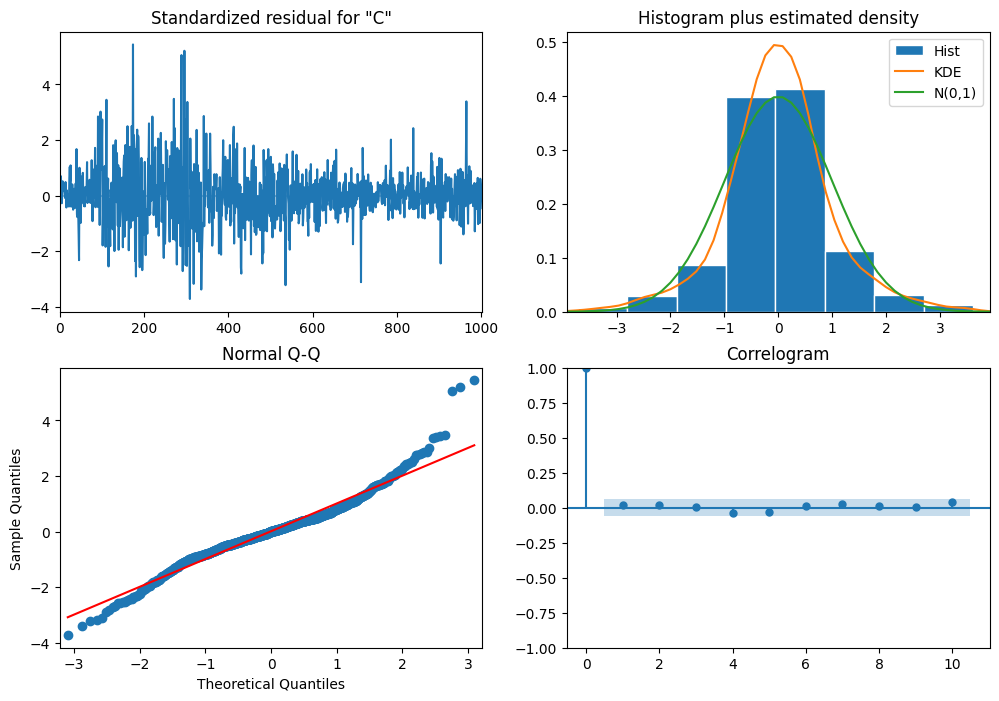

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


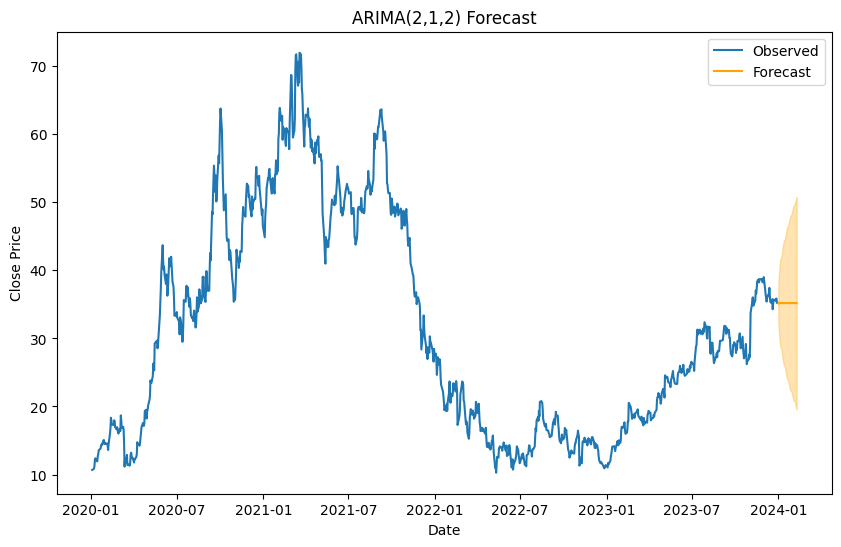

In [22]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

file_path = 'draftkings_data.csv'  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Convert 'Date' to datetime and set as index
print(data.columns)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Fit the ARIMA model with the best parameters (2, 1, 2)
best_model = ARIMA(data['Close'], order=(2, 1, 2))
results = best_model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecasting
forecast_steps = 30  # Number of days to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Get forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('ARIMA(2,1,2) Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
